In [4]:
import pandas as pd

df = pd.read_csv('mutation_coverage_data.csv')

In [8]:
df['Mutation Coverage (%)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 475 entries, 0 to 474
Series name: Mutation Coverage (%)
Non-Null Count  Dtype  
--------------  -----  
475 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [22]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Line Coverage (%)'], df['Mutation Coverage (%)'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}')


Pearson correlation coefficient: 0.9289115535089226
p-value: 3.3342015004519856e-206


/var/folders/1h/93wslqxj7kz5qnq_szkpw2nc0000gn/T/ipykernel_8268/2049629796.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='Line Coverage (%)', y='Mutation Coverage (%)', data=df, palette='viridis', s=100, alpha=0.7)
/var/folders/1h/93wslqxj7kz5qnq_szkpw2nc0000gn/T/ipykernel_8268/2049629796.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1), borderaxespad=0.)


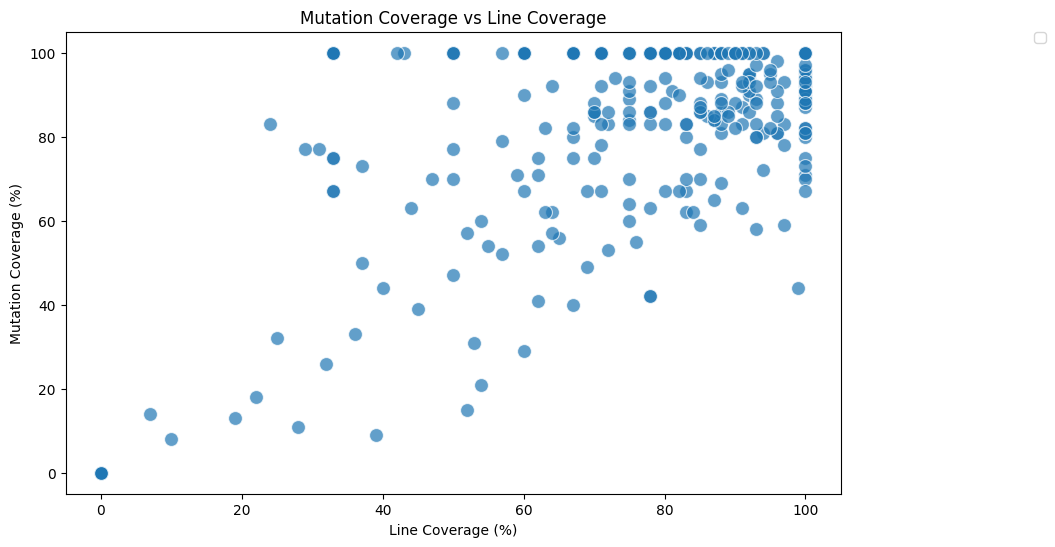

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Line Coverage (%)', y='Mutation Coverage (%)', data=df, palette='viridis', s=100, alpha=0.7)

scatter_plot.set_title('Mutation Coverage vs Line Coverage')
scatter_plot.set_xlabel('Line Coverage (%)')
scatter_plot.set_ylabel('Mutation Coverage (%)')

plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1), borderaxespad=0.)
plt.show()

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import statsmodels.api as sm

# Adding a constant to the independent variable
code_coverage_with_const = sm.add_constant(df['Line Coverage (%)'])

# Performing the regression
model = sm.OLS(df['Mutation Coverage (%)'], code_coverage_with_const).fit()

# Displaying the summary of regression analysis
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Mutation Coverage (%)   R-squared:                       0.863
Model:                               OLS   Adj. R-squared:                  0.863
Method:                    Least Squares   F-statistic:                     2976.
Date:                   Wed, 22 May 2024   Prob (F-statistic):          3.33e-206
Time:                           13:43:02   Log-Likelihood:                -1995.5
No. Observations:                    475   AIC:                             3995.
Df Residuals:                        473   BIC:                             4003.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   